In [4]:
cd ~/Documents/ML_DL/

/home/pranav/Documents/ML_DL


In [5]:
ls

FuelConsumption.csv  SImple_Linear_Regressor.ipynb


In [6]:
pwd

'/home/pranav/Documents/ML_DL'

In [7]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-04-10 13:55:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   328KB/s    in 0,2s    

2021-04-10 13:55:05 (328 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
import matplotlib.pyplot as plt
import PIL
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
# Read dataframe:
data_frame = pd.read_csv('FuelConsumption.csv')

# Taker a look at the data:
data_frame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Summarize the data:
data_frame.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# Seeing some features: 
created_data_frame = data_frame[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
created_data_frame.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd597aedad0>,
      dtype=object)

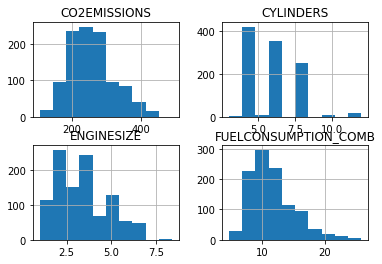

In [7]:
# PLotting the features of the created dataset: 
features = created_data_frame[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
features.hist()

Text(0, 0.5, 'Emissions')

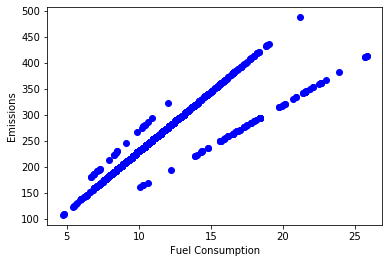

In [8]:
# PLot features vs CO2Emissions:
plt.scatter(created_data_frame.FUELCONSUMPTION_COMB, created_data_frame.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')

Text(0.5, 0, 'Emissions')

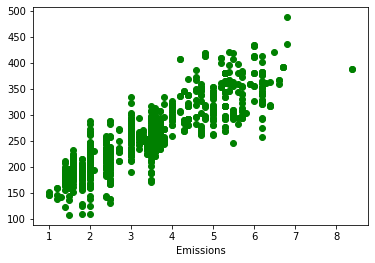

In [9]:
# PLot Engine Size vs CO2 Emission:
plt.scatter(created_data_frame.ENGINESIZE, created_data_frame.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.xlabel('Emissions')

Text(0, 0.5, 'Emissions')

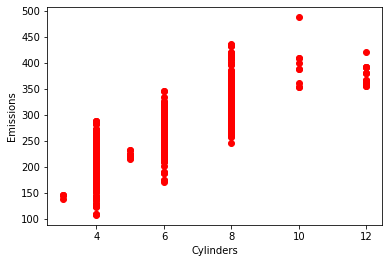

In [10]:
# PLot Cylinders vs CO2 Emission:
plt.scatter(created_data_frame.CYLINDERS, created_data_frame.CO2EMISSIONS, color='red')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')

In [11]:
# Creating train/test dataset: 

# np.random.rand(x) returns x random numbers with uniforms distribution over 0 to 1 (exclusive). When we apply the condition < 0.8 it returns True for every number which is less than 0.8 This will make sure that approximately 80 percent of values are True and rest are False. So, in essence you can have a 80/20 train test split when you apply this mask to your original df. df[msk] will return every index for which the msk value is True. And ~msk means "not equal to" in df indexing.

mask = np.random.rand(len(data_frame)) < 0.8
train = created_data_frame[mask]
test = created_data_frame[~mask]

Text(0, 0.5, 'Emission')

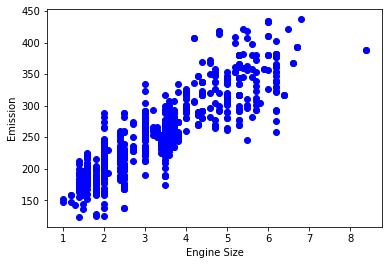

In [12]:
# Training dataset:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [13]:
# Using linear regression model: 

from sklearn import linear_model
regressor = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ', regressor.intercept_)

Coefficients:  [[38.88975146]]
Intercept:  [125.83834254]


Text(0, 0.5, 'Emission')

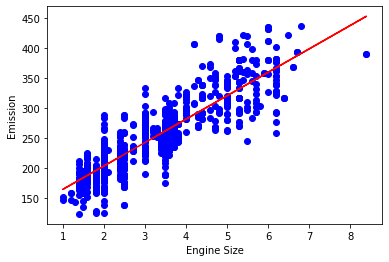

In [15]:
# PLot the fit line over the training dataset:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regressor.coef_[0][0]*train_x + regressor.intercept_[0], color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [17]:
# Test prediction: 
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = regressor.predict(test_x)

print('Mean absolute error: ', np.mean(np.absolute(test_yhat - test_y)))
print('Residual sum of squares: ', np.mean((test_yhat - test_y) ** 2))
print('R2-score: ', r2_score(test_y, test_yhat))

Mean absolute error:  24.879443881636252
Residual sum of squares:  1073.162205462702
R2-score:  0.7616909197431245
